In [59]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Setup Complete


In [2]:
data = pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_21716\912182859.py:1: DtypeWarning: Columns (0: license) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


In [3]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  str    
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  str    
 4   host name                       102193 non-null  str    
 5   neighbourhood group             102570 non-null  str    
 6   neighbourhood                   102583 non-null  str    
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  str    
 10  country code                    102468 non-null  str    
 11  instant_bookable                102494 non-null  object 
 12  cancellation_policy        

In [5]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='str')

In [6]:
columns_to_keep = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review']

columns_to_drop = ['reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'id']

In [7]:
len(columns_to_keep)

19

In [8]:
len(columns_to_drop)

7

In [9]:
#1st Method - Filtering Data

In [10]:
df = data[columns_to_keep]

In [11]:
df

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


In [12]:
#2nd Method - Dropping Columns

In [13]:
data.drop(columns = columns_to_drop, inplace = True)

In [14]:
data.shape

(102599, 19)

In [15]:
data.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review'],
      dtype='str')

In [16]:
data.rename(columns={"NAME": "Name"}, inplace = True)

In [17]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


In [18]:
data.columns

Index(['Name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review'],
      dtype='str')

In [19]:
new_columns_names=[]
for i in data.columns:
    new_columns_names.append(i.upper())

In [20]:
new_columns_names

['NAME',
 'HOST ID',
 'HOST_IDENTITY_VERIFIED',
 'HOST NAME',
 'NEIGHBOURHOOD GROUP',
 'NEIGHBOURHOOD',
 'LAT',
 'LONG',
 'COUNTRY',
 'COUNTRY CODE',
 'INSTANT_BOOKABLE',
 'CANCELLATION_POLICY',
 'ROOM TYPE',
 'CONSTRUCTION YEAR',
 'PRICE',
 'SERVICE FEE',
 'MINIMUM NIGHTS',
 'NUMBER OF REVIEWS',
 'LAST REVIEW']

In [21]:
new_df_to_modify = data.copy()

In [22]:
new_df_to_modify.columns= new_columns_names

In [23]:
new_df_to_modify

,NAME,HOST ID,HOST_IDENTITY_VERIFIED,HOST NAME,NEIGHBOURHOOD GROUP,NEIGHBOURHOOD,LAT,LONG,COUNTRY,COUNTRY CODE,INSTANT_BOOKABLE,CANCELLATION_POLICY,ROOM TYPE,CONSTRUCTION YEAR,PRICE,SERVICE FEE,MINIMUM NIGHTS,NUMBER OF REVIEWS,LAST REVIEW
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015


In [24]:
data.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [25]:
data.drop_duplicates(inplace = True)

In [26]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019
102054,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019
102056,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,$848,NaN,2.0,0.0,NaN


In [27]:
data.duplicated().sum()

np.int64(0)

In [28]:
data.isna().sum()

Name                        250
host id                       0
host_identity_verified      289
host name                   404
neighbourhood group          29
neighbourhood                16
lat                           8
long                          8
country                     532
country code                131
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
dtype: int64

In [29]:
data.drop(columns = ['last review'], inplace = True)

In [30]:
data.dropna(inplace = True)

In [31]:
data.isna().sum()

Name                      0
host id                   0
host_identity_verified    0
host name                 0
neighbourhood group       0
neighbourhood             0
lat                       0
long                      0
country                   0
country code              0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
number of reviews         0
dtype: int64

In [32]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0
7,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,False,flexible,Private room,2018.0,$822,$164,1.0,9.0
102030,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,True,moderate,Private room,2015.0,$455,$91,4.0,36.0
102031,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,True,flexible,Private room,2020.0,"$1,078",$216,1.0,58.0
102032,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,False,moderate,Private room,2007.0,$103,$21,7.0,40.0


In [33]:
data['host_identity_verified'].str.upper()

0         UNCONFIRMED
1            VERIFIED
4            VERIFIED
5            VERIFIED
7         UNCONFIRMED
             ...     
102029    UNCONFIRMED
102030       VERIFIED
102031       VERIFIED
102032    UNCONFIRMED
102040       VERIFIED
Name: host_identity_verified, Length: 99342, dtype: str

In [34]:
data['host_identity_verified'] = data['host_identity_verified'].str.upper()

In [35]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0
7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,False,flexible,Private room,2018.0,$822,$164,1.0,9.0
102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,True,moderate,Private room,2015.0,$455,$91,4.0,36.0
102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,True,flexible,Private room,2020.0,"$1,078",$216,1.0,58.0
102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,False,moderate,Private room,2007.0,$103,$21,7.0,40.0


In [36]:
data["instant_bookable"].apply(lambda x:1 if x == True else 0)

0         0
1         0
4         0
5         1
7         0
         ..
102029    0
102030    1
102031    1
102032    0
102040    1
Name: instant_bookable, Length: 99342, dtype: int64

In [37]:
data["instant_bookable"] = data["instant_bookable"].apply(lambda x:1 if x == True else 0)

In [38]:
data

,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0
1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0
7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,$822,$164,1.0,9.0
102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,$455,$91,4.0,36.0
102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,"$1,078",$216,1.0,58.0
102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,$103,$21,7.0,40.0


In [39]:
data.reset_index(inplace = True)

In [40]:
data["instant_bookable"][15]

np.int64(1)

In [41]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,$966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,$822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,$455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,"$1,078",$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,$103,$21,7.0,40.0


In [42]:
data['price']

0          $966 
1          $142 
2          $204 
3          $577 
4        $1,060 
          ...   
99337      $822 
99338      $455 
99339    $1,078 
99340      $103 
99341      $982 
Name: price, Length: 99342, dtype: str

In [43]:
data['price'] = data['price'].str.replace('$', '')

In [44]:
data['price'] = data['price'].str.replace(',', '')

In [45]:
data['price']

0         966 
1         142 
2         204 
3         577 
4        1060 
         ...  
99337     822 
99338     455 
99339    1078 
99340     103 
99341     982 
Name: price, Length: 99342, dtype: str

In [46]:
data['price'] = data['price'].str.replace(' ', '')

In [47]:
data['price'][15]

'1020'

In [48]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [49]:
type(data["price"] [1])

str

In [50]:
data['price'] = data['price'].astype(int)

In [51]:
type(data["price"] [15])

numpy.int64

In [52]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [53]:
data.to_csv("Cleaned_data", index= False)

In [54]:
pd.read_csv("Cleaned_data")

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [55]:
data

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,$193,10.0,9.0
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013.0,577,$115,3.0,74.0
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,$212,45.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018.0,822,$164,1.0,9.0
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015.0,455,$91,4.0,36.0
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020.0,1078,$216,1.0,58.0
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007.0,103,$21,7.0,40.0


In [56]:
data.to_excel("Excel_Cleaned_data.xlsx", index = False)

In [75]:
pd.read_excel("Excel_Cleaned_data.xlsx")

,index,Name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews
0,0,Clean & quiet apt home by the park,80014485718,UNCONFIRMED,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020,966,$193,10,9
1,1,Skylit Midtown Castle,52335172823,VERIFIED,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,$28,30,45
2,4,Entire Apt: Spacious Studio/Loft by central park,92037596077,VERIFIED,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,$41,10,9
3,5,Large Cozy 1 BR Apartment In Midtown East,45498551794,VERIFIED,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,1,flexible,Entire home/apt,2013,577,$115,3,74
4,7,BlissArtsSpace!,90821839709,UNCONFIRMED,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009,1060,$212,45,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,102029,Cozy room in a 2B with backyard access,5155155913,UNCONFIRMED,Cristina,Queens,Astoria,40.76987,-73.92679,United States,US,0,flexible,Private room,2018,822,$164,1,9
99338,102030,An East Williamsburg Delight,71564706996,VERIFIED,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,US,1,moderate,Private room,2015,455,$91,4,36
99339,102031,Cozy bedroom in williamsburg,83101851929,VERIFIED,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,US,1,flexible,Private room,2020,1078,$216,1,58
99340,102032,Spacious Room w/ 2 Bed,69037598918,UNCONFIRMED,Christine,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007,103,$21,7,40


In [58]:
list(data.columns)

['index',
 'Name',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews']

C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_21716\4026455768.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room type', y='price', data=data, estimator='mean', ci=None)


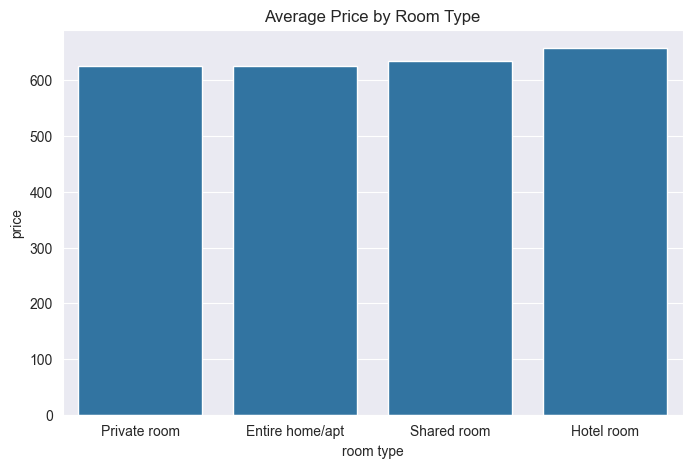

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(x='room type', y='price', data=data, estimator='mean', ci=None)
plt.title('Average Price by Room Type')

plt.show()


In [70]:
df.groupby('room type')['price'].describe()


,count,unique,top,freq
room type,,,,
Entire home/apt,53568,1151,$379,80
Hotel room,116,107,$594,2
Private room,46450,1151,$138,73
Shared room,2218,819,$837,11


In [74]:
df['price'].describe()

count     102352
unique      1151
top        $206 
freq         137
Name: price, dtype: object

In [77]:
data = pd.read_csv("Cleaned_data")

C:\Users\GULLYHUB\AppData\Local\Temp\ipykernel_21716\173037272.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood group', y='price', data=data, estimator='mean', ci=None)


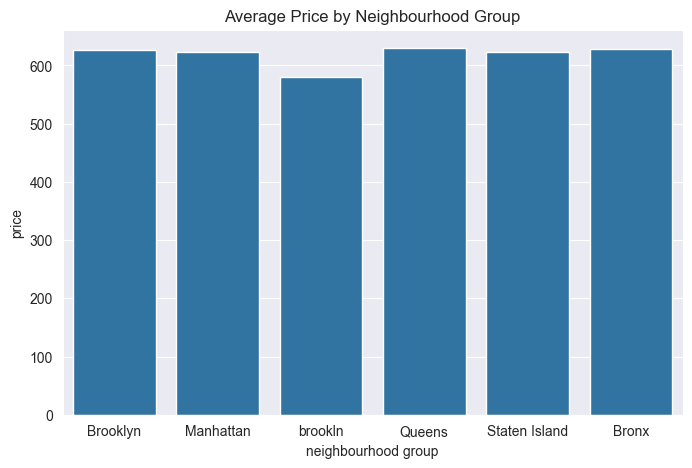

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood group', y='price', data=data, estimator='mean', ci=None)
plt.title('Average Price by Neighbourhood Group')
plt.show()

In [82]:
data['price'].describe()

count    99342.000000
mean       625.484387
std        331.739485
min         50.000000
25%        340.000000
50%        624.000000
75%        913.000000
max       1200.000000
Name: price, dtype: float64

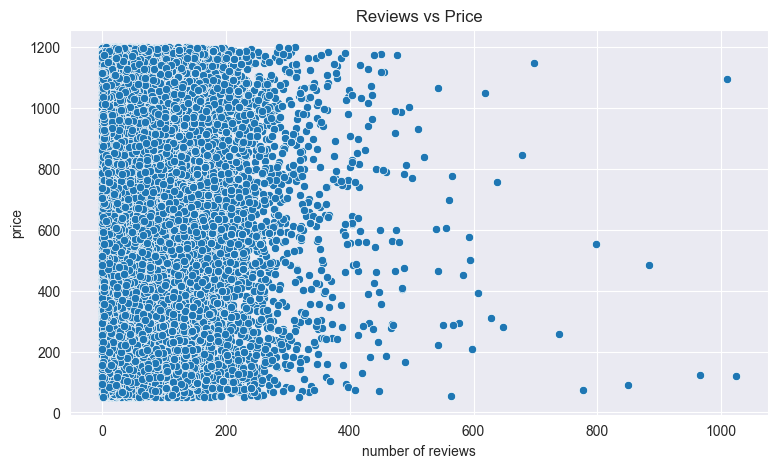

In [85]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='number of reviews', y='price', data=data)
plt.title('Reviews vs Price')
plt.show()

In [86]:
data[['price','number of reviews']].corr()

,price,number of reviews
price,1.00000,0.00506
number of reviews,0.00506,1.00000
